###  G08 : Óscar Morujo Fernández, Gorka Silva Ramón

# PARTE 2 : BREAST CANCER


## 1 - INTRODUCCIÓN

En este documento vamos a analizar los datos de de las celulas de 569 tumores, de los cuales tenemos 10 carácteristicas diferentes y 3 valores por cada una de estas(valor medio ,desviación típica y valor extremo). Estas carácterísticas se calculan a partir de una imagen digitalizada de una masa mamaria diminuta.

Las 10 características son las siguientes:

    1-radius : media de las distancias entre todos los puntos en el perimetro y el centro
    2-texture : desviacíon estandar sobre la escala de grises
    3-perimeter
    4-area
    5-smoothness : variación en las longitudes de los radios
    6-compactness: perimeter^ 2 / area -1.0
    7-concavity : severidad de las porciones cóncavas del contorno
    8-concave points : numero de porciones cóncavas en el contorno
    9-symmetry
    10-fractal dimension : ("coastline approximation" - 1) una dimensión fractal es una relación que nos proporciona un índice estadístico de complejidad que compara cómo los detalles en un patrón cambian con la escala en la que se mide.


Por lo tanto, en nuestra tabla de datos tendremos de la columna 0 a la 9 las features "mean",de la 10 a la 19 las "standard error" (desviación típica) , de la 20 a la 29 las "worst";y además añadiremos una columna que nos indique si es maligno o benigno( 0 y 1 respectivamente)
    


    

# Preparando los datos:

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

breast_cancer= datasets.load_breast_cancer()
print(breast_cancer.keys())

df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names']) 
df

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#Tenemos 569 filas(una por cada tumor) y 30 columnas(una por característica)
df.shape

(569, 30)

In [4]:
#Añadimos una columna que nos dice si es maligno o benigno ( 0 o 1)
df['result']=breast_cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
#Tipos de las variables
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

1    357
0    212
Name: result, dtype: int64

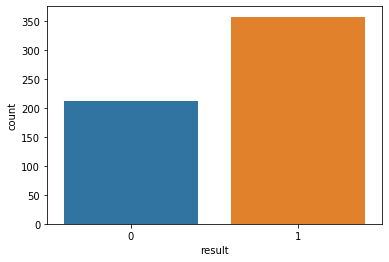

In [290]:
sns.countplot(df['result'],label='count')
df['result'].value_counts()


Como podemos ver, los malignos son la minoria( un 37,5%). Ahora vamos a ver los estadísticos descriptivos de las variables:

#  TABLAS DE ESTADÍSTICOS DESCRIPTIVOS

In [6]:

df.iloc[:,0:30].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Estadísticos descriptivos de los malignos:

In [7]:
df[df['result'] == 0].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


Estadísticos descriptivos de los benignos:

In [9]:
df[df['result'] == 1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


Como podemos observar, tanto mean radius,mean perimeter y mean area son mayores en los malignos que en los benignos, lo que nos dice principalmente que a mayor tamaño mayor riesgo de que sea maligno.
La concavidad media de los benignos suele tener un valor mas bajo que los malignos, de hecho la media es 4 veces inferior que la de los malignos(pasa igual con  worst concavity y worst concave points)
Lo mismo pasa con la media numero de puntos concavos(cuanto mayor mas probabilidad de maligno).
Podemos sacar aún mas relaciones, pero mejor analizar las correlaciones de las variables y representarlo visualmente para facilitar el trabajo.


 A continuacion vamos a representar y a analizar la correlación que tienen las variables entre sí:
            

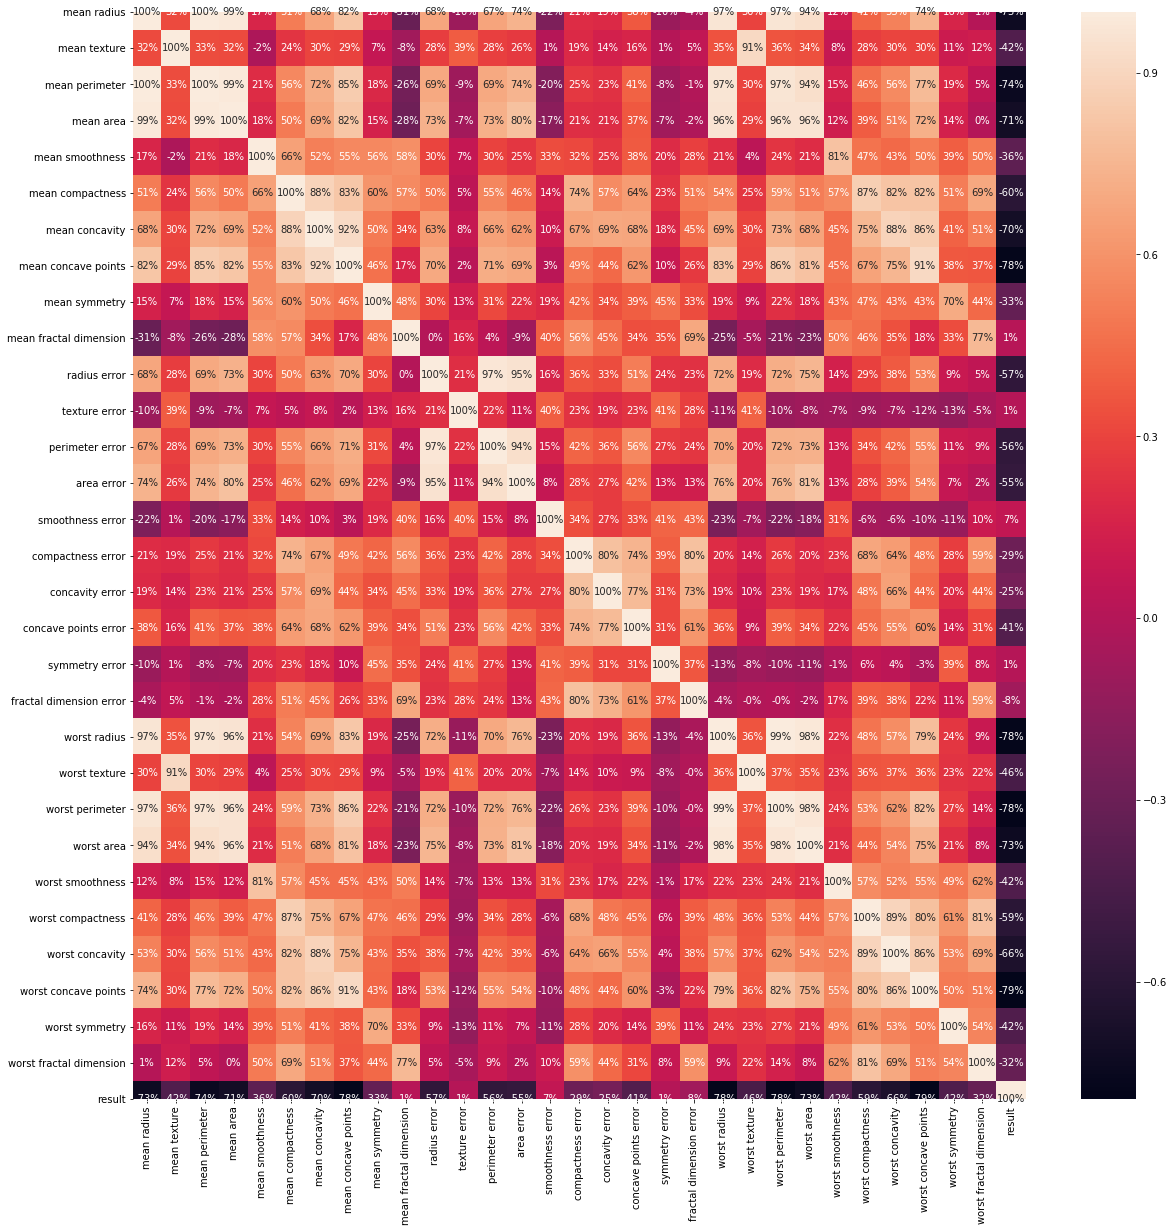

In [10]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

Como podemos observar tenemos varias variables con una correlacion muy fuerte, por lo tanto a la hora de analizar nuestros datos nos convendria eliminar ciertas variables y así facilitar el trabajo.
Algunas de estas variables son :
    
    -mean radius y mean perimeter con un 100% de correlación
    -mean area y mean radius con un 99% de correlación
    -mean area y mean perimeter con un 99% de correlación
    -worst perimeter y worst radius con un 99 % de correlacion
    

De esto sacamos la conclusión de que las siguientes variables estan muy correlacionadas entre sí:

    -Radius,perimeter y area(que son conceptos métricos que estan muy relacionados entre sí para calcular el tamaño)
    -Compactness,concavity y concave points
    
Además las medidas "mean" y las "worst" de cada variable estan fuertemente correlaccionadas
   

Sí representamos las variables nombradas en este apartado, podemos ver que efectivamente podremos reducir la dimesionalidad ya que muchos pares son iguales.(ademas sus funciones de distribución son muy similares como podemos ver)

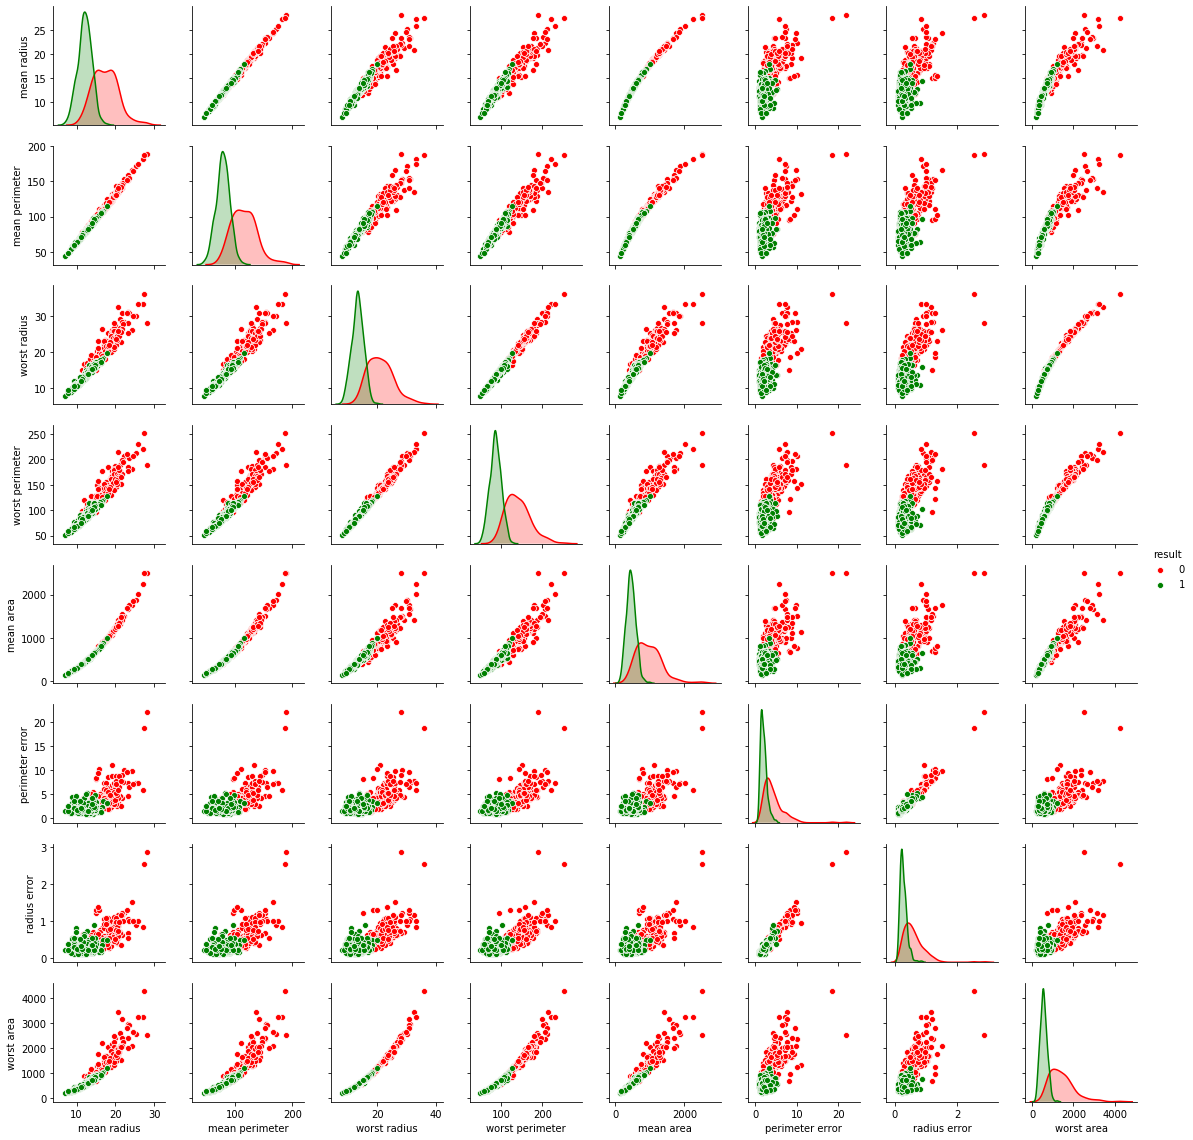

In [13]:

color_dict = dict({0:'red',1: 'green'})

sns.pairplot(df, vars=["mean radius", "mean perimeter","worst radius","worst perimeter"
                       ,"mean area","perimeter error", "radius error","worst area"],
             hue='result',palette = color_dict,height=2)


C:\Users\oscar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\oscar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


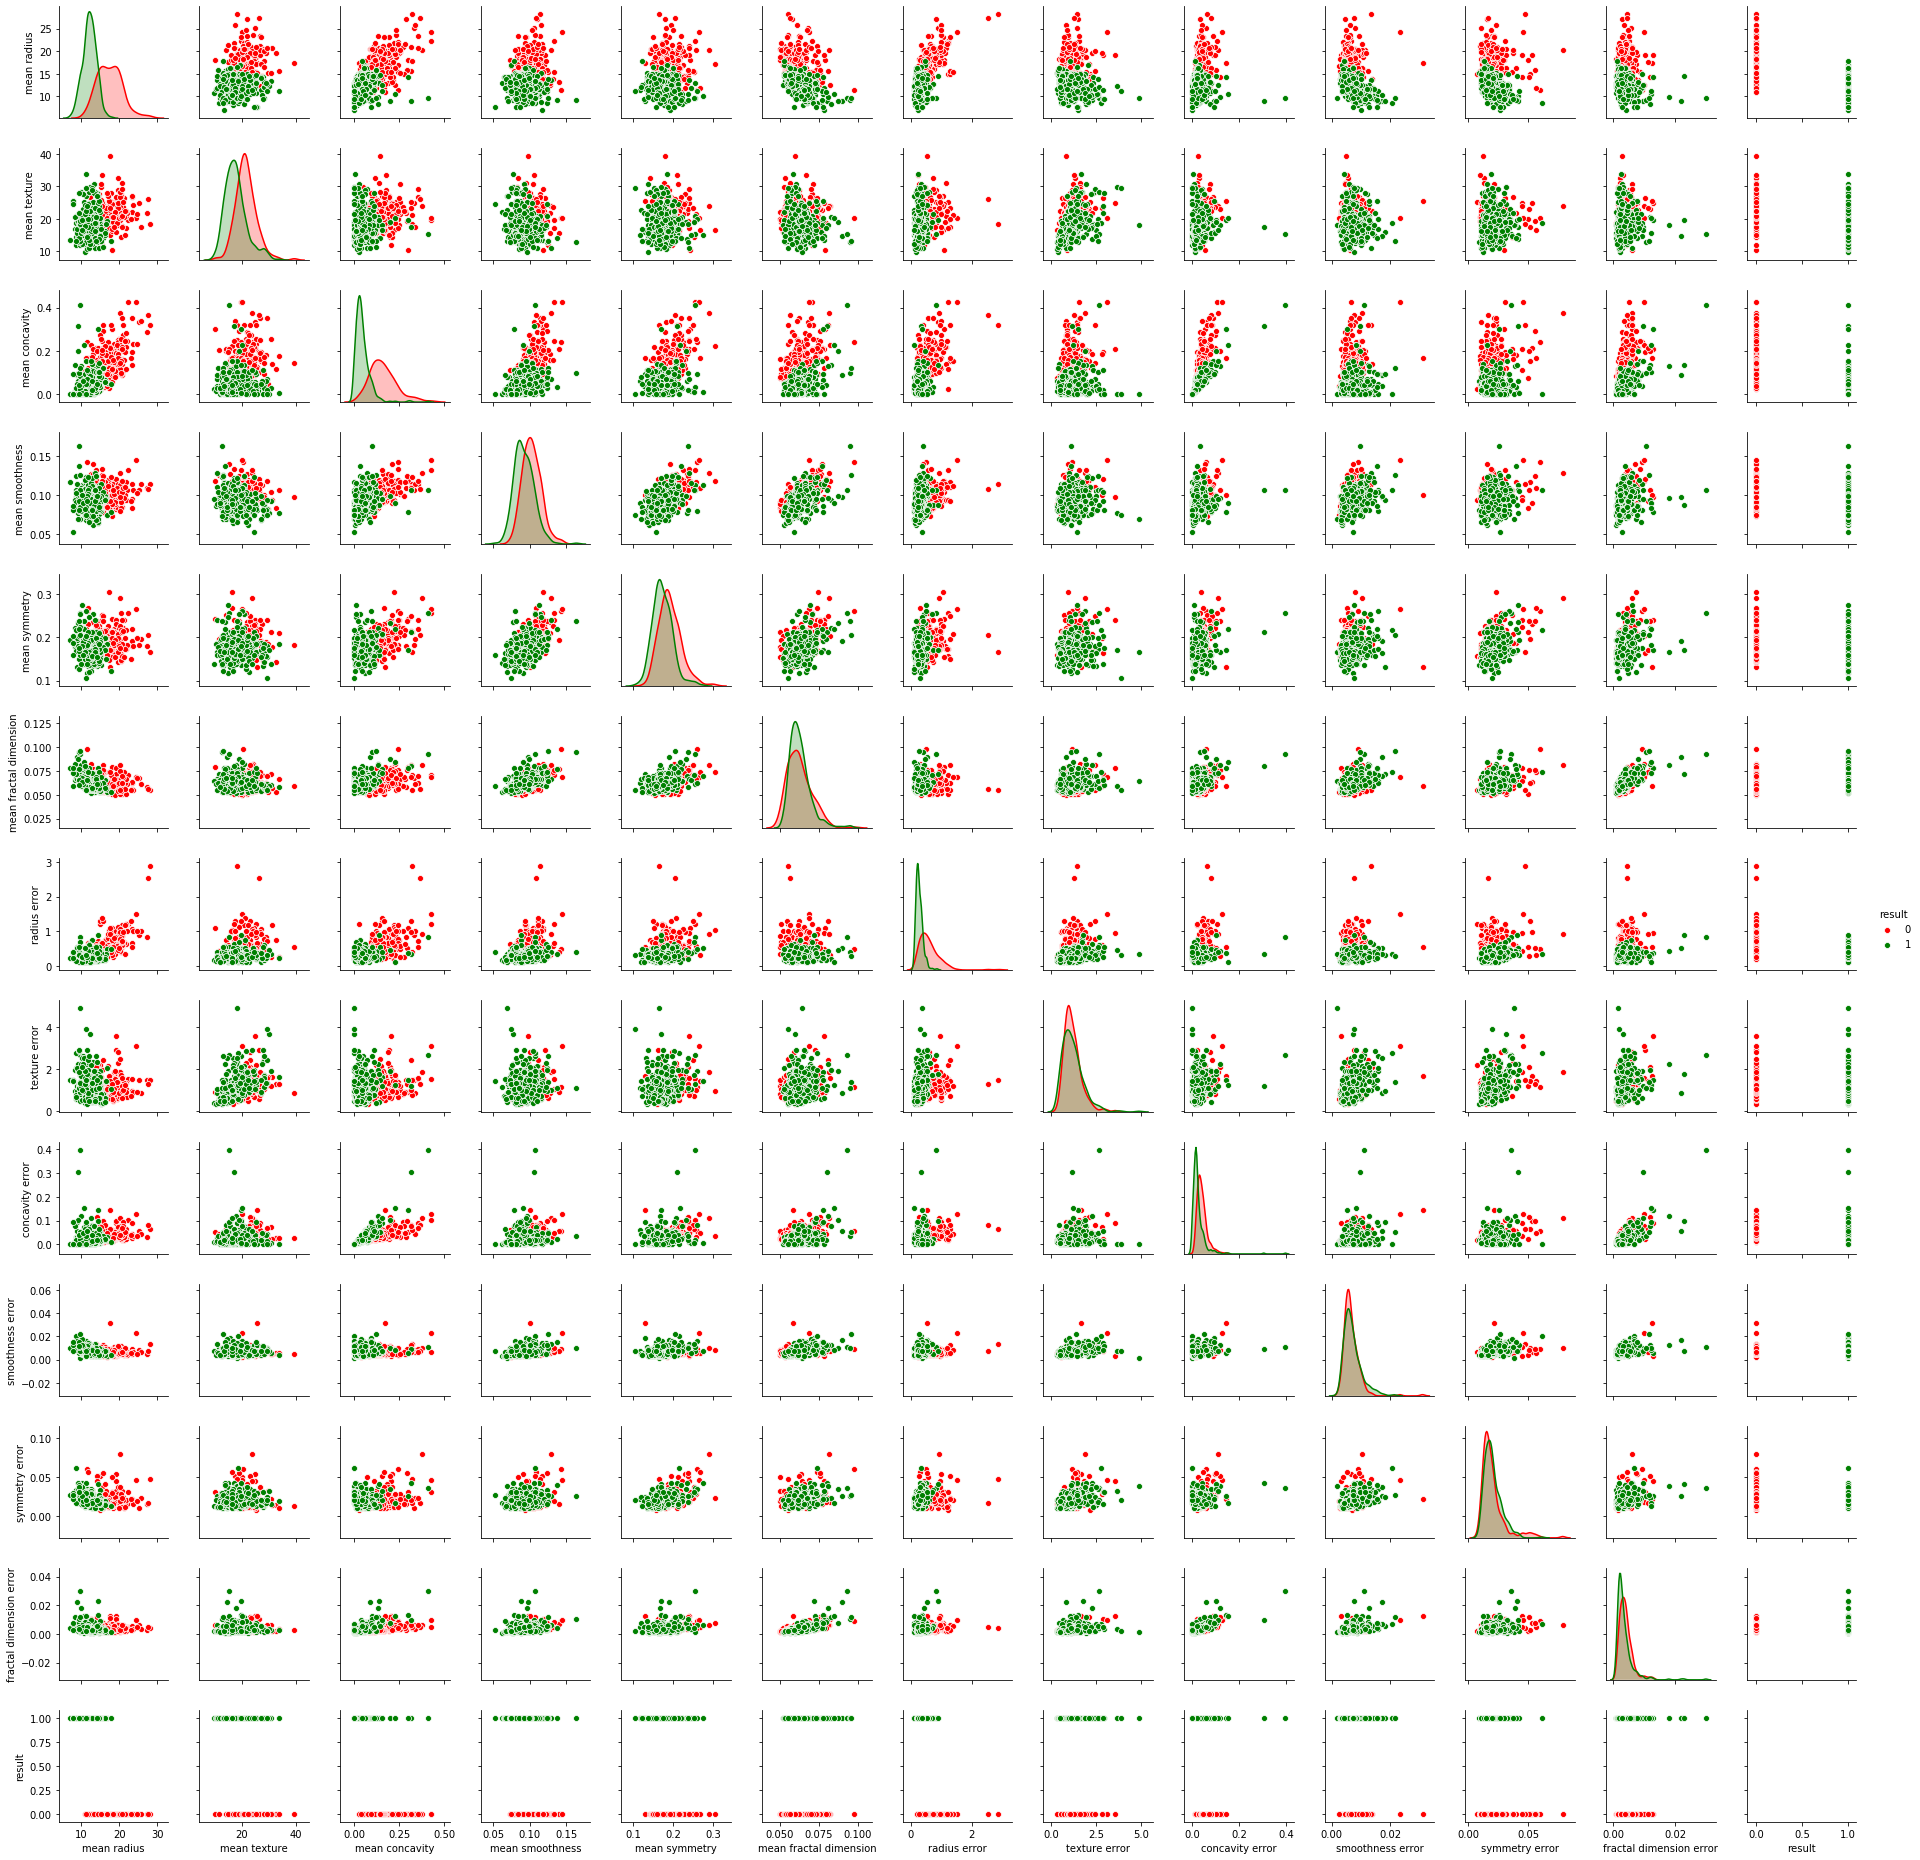

In [15]:

color_dict = dict({0:'red',1: 'green'})

sns.pairplot(df, vars=["mean radius","mean texture","mean concavity",
                       "mean smoothness","mean symmetry","mean fractal dimension",
                       "radius error","texture error","concavity error",
                       "smoothness error","symmetry error","fractal dimension error","result"],
             hue='result',palette = color_dict,height=2)


Si nos fijamos bien en la gráfica multidimensional, vemos que en todos los pares los malignos se encuentran mayoritariamente mas dispersos como podemos ver en la función de densidad de prácticamente todas las variables y en valores mas grandes de las variables que tienen que ver con su tamaño y forma,mientras que los benignos se mantienen en valores pequeños y en general están todos acumulados en un volumen mas pequeño.
Si nos fijamos tambien podemos observar que hay valores de tumores malignos que estan muy alejados de su respectivo cluster, esto indica casi con seguridad que cualquier valor esporádico lejano del cluster con valores grandes va a ser maligno.
Además podemos ver que si representamos cualquier variable con otra de "error", algunos puntos se alejan de las demás muestras de su misma clase,lo cual parece ser más normal en los benignos que en los malignos.

Si nos fijamos mejor en las funciones de densidad de las variables, vemos que las que mejor separan las dos clases son mean radius,mean concavity  y radius error.



## ESCALADO DE VARIABLES


Escalar las variables cambia las unidades, no la cantidad de error, además los arboles de decisión va a preguntar por la variable que mejor entropia genera en ese nodo así que no afecta que escalemos o no los datos, ya que obtendremos el mismo resultado.


## ÁRBOL DE DECISIÓN


Los árboles de decisión son muy útiles para interpretar los datos ya que pueden visualizarse; además el coste de usar un arbol es logarítmico.
En este caso usaremos un árbol usando comparaciones númericas(variables cuantitativas), aunque también podrían usarse con variables cualitativas.

Tenemos también algunas deasventajas: por ejemplo pueden no generalizar bien, es decir, sobreaprendiendo(para evitar esto habría que establecer una profundidad máxima).



Si entrenamos el árbol con la configuracion por defecto vemos que siempre tiene un 100% de aciertos en su train  y podria haber overfitting

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree

# Como la proporción de clases a predecir está desbalanceada (2/3 y 1/3) es importante
# usar la versión estratificada que mantiene la proporción de elementos de cada clase 
# al hacer la partición
# Partimos el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target, test_size=0.3, random_state=0,stratify=breast_cancer.target)


# Creamos y entrenamos el árbol de decisión
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.9122807017543859)

In [ ]:
X_train

In [71]:
pred = clf.predict(X_test)
print(pred)
print()
print(y_test)

[0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1]

[0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1]


Modificamos la configuración del árbol para que tenga menos sobreajuste, es decir, que no sobreaprenda.
Para esto vamos a establecerle una profundidad máxima:

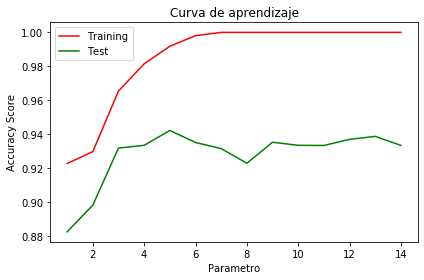

In [72]:
from sklearn.model_selection import cross_validate

train_accuracy = []
test_accuracy = []

max_depths = range(1, 15)
for md in max_depths: 
    # Entrenar y validar
    clf = DecisionTreeClassifier(splitter="best",criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, breast_cancer.data, breast_cancer.target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
    # Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Observamos que si establecemos una profundidad máxima mayor a 3, estariamos sobre-aprendiendo.
Con profundidad 4 estamos empezando a memorizar los datos de entrenamiento y por lo tanto generalizando mal.

In [73]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
clf = DecisionTreeClassifier(criterion="entropy",  
                             max_depth=3,          
                             min_samples_split=2,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9773869346733668, 0.9122807017543859)

Ahora parece generalizar mejor nuestro modelo, vamos a proceder a dibujar y analizar el arbol que resulta de clasificar el 70% seleccionados para el entrenamiento.

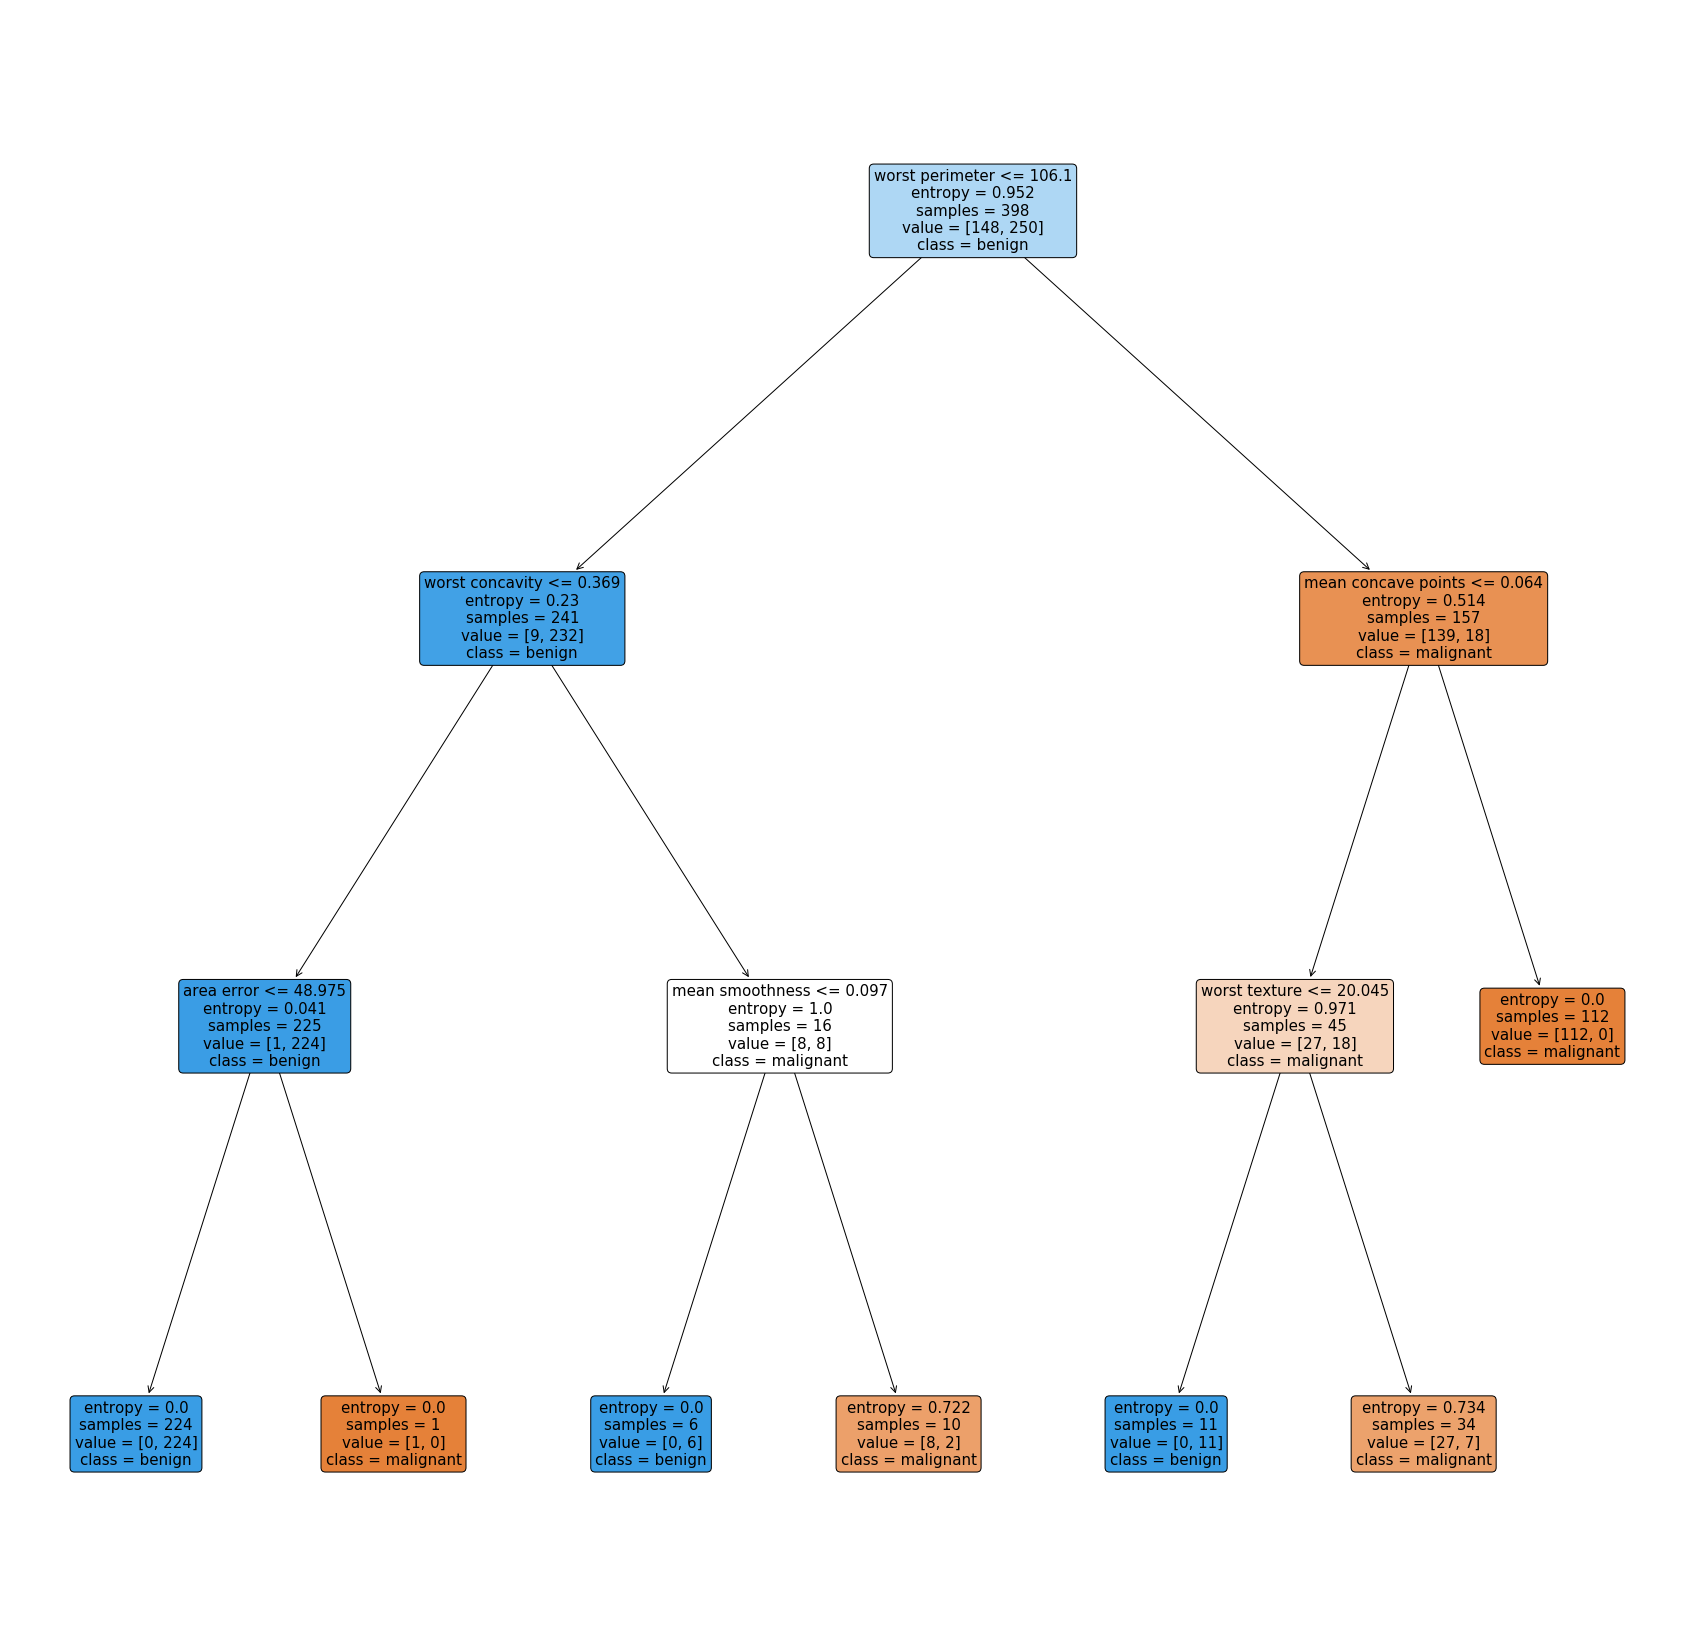

In [20]:
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names,
          rounded=True,fontsize=15)
plt.show()
print()

Como vemos, tenemos 398 individuos (los del 70% del conjunto training), de los cuales 148 son malignos y 250 son benignos.
En el nodo hoja con preguntar por el tamaño de worst perimeter( que podría haber sido por igual cualquiera otras de las variables con las que tenia fuerte correlación) dividimos bastante bien las dos clases y  disminuimos la entropía rápidamente.
Pasamos de tener una entropía de 0.952 a tener en el hijo izquierdo 0.23  y en el hijo derecho 0.514.
Vemos que es facil identificar los benignos con un par de preguntas como lo son el perimetro, el area y la concavidad(con estas preguntas habriamos clasificiado 224 benignos y 1 maligno).
De los 241 ejemplares que tienen worst perimeter <= 106.1 , tenemos que preguntar si la concavidad es mayor que 0.369 para salir de dudas con 16 ejemplos que podrían ser malignos( los cuales se clasifican con mean smothness que separa facilmente 6 benignos y los restantes los clasifica como malignos aunque con una entropia de 0.722( de los 10 que tenemos 8 son malignos y 2 benignos, pero es mejor asi que si lo clasificaramos como benigno y fuera maligno).

Los que tienen worst perimeter mayor de 106.1,muy probablemente sean malignos(157 ejemplares), y si preguntamos  por los puntos concavos clasificamos 112 de los 157 que teniamos.
Con dos preguntas sabemos que es maligno, pero los restantes son dificiles de clasificar.
Si preguntamos por worst texture conseguimos clasificar 11 de estos como benignos y otros 34 como malignos pero con una entropia de 0.734 ( la clase dominante es la de los malignos con 27 ejemplares), por lo que tenemos 7 benignos que pueden haber sido clasificados como malignos.

Vemos que con pocas preguntas podemos obtener bastante homogeneidad y bastante probabilidad de acertar


Una vez hemos determinado la combinación de parámetros del clasificador mejores (evitando sobre-aprender) y tenemos claro cuál es el rendimiento esperable de dichos parámetros cuando usamos datos nuevos (su rendimiento en la parte de test), podemos volver a entrenar el modelo con todo el conjunto de datos y los parámetros elegidos

In [74]:

clf = DecisionTreeClassifier(criterion="entropy", 
                             splitter="best",
                             max_depth=3,
                             min_samples_split=2,
                             max_leaf_nodes=None,
                             random_state=0)
clf = clf.fit(breast_cancer.data, breast_cancer.target)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy


(0.9748743718592965, 0.9532163742690059)

# Ahora procedemos a analizar el arbol óptimo que hemos encontrado:

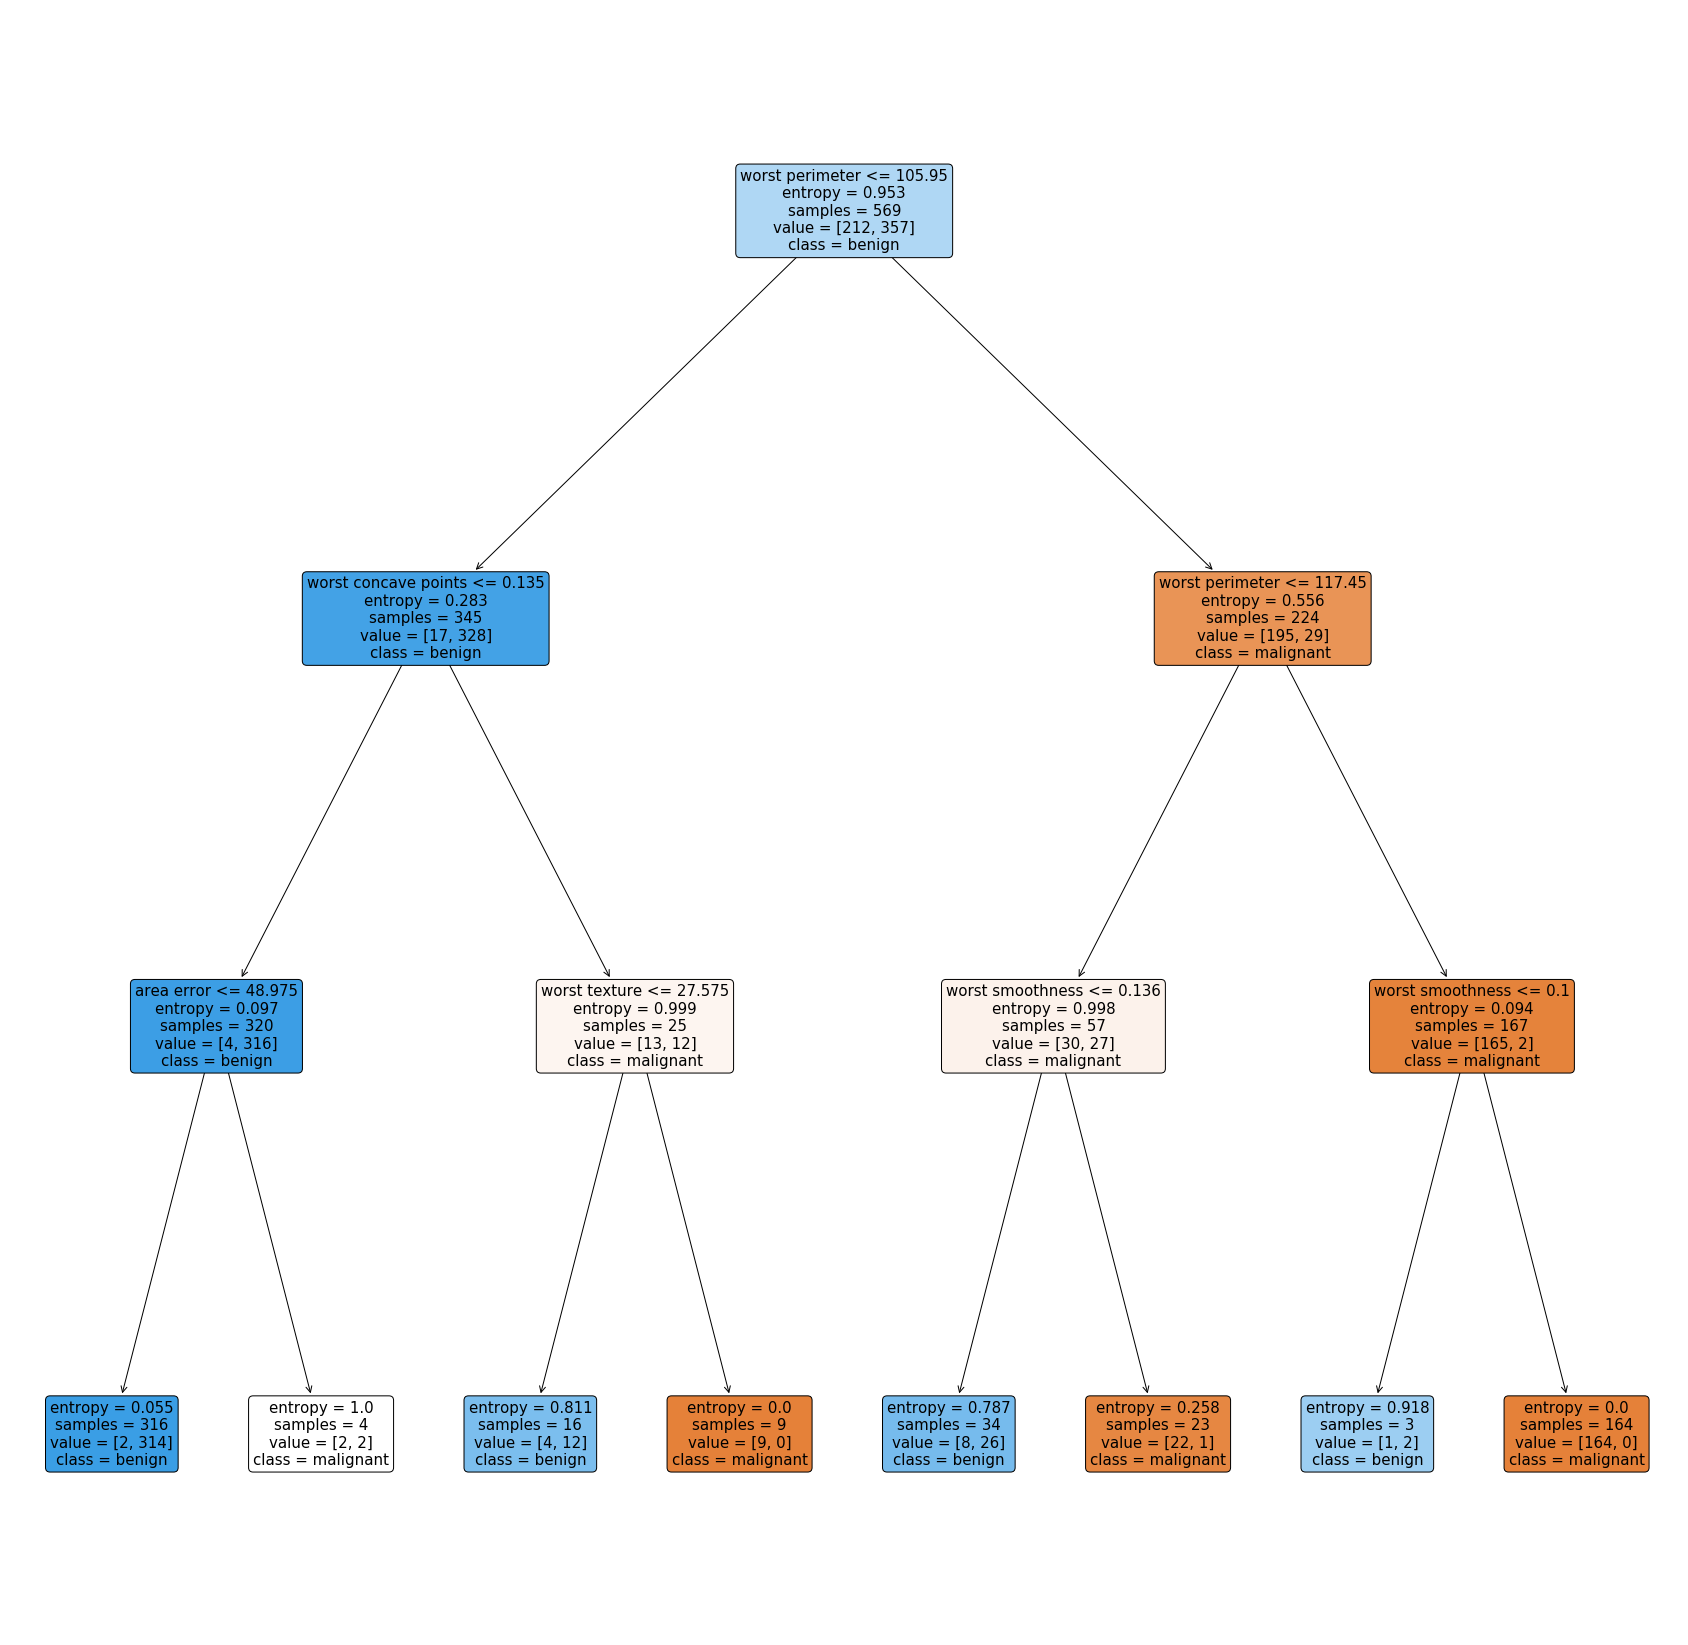

In [22]:
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names,
          rounded=True,fontsize=15)
plt.show()

Podemos ver que la pregunta que se hace en el nodo raiz( worst perimeter <= 105.95 ) separa muy bien y disminuye la entropia drásticamente a la hora de detectar benignos

    - Si avanzamos por el hijo izquierdo vemos que de los 569 hemos seleccionado 345 ejemplares ( de los cuales 328 son benignos y 17 malignos), así que muy probablemente sea benigno.Ahora tendremos que preguntar por la variable worst concave points.
    
            -Si es menor que 0.135 tendremos que preguntar por area error que genera un hijo con una entropia muy cercana a cero(314 benignos y 2 malignos) y otro hijo con una entropia de 1.0, en la que tenemos 2 muestras de cada clase.
            -Si es mayor tendremos que preguntar por la textura; si es mayor que 27.575 conseguimos una enrtopia de 0.0 y conseguimos llegar a un nodo hoja en la que solo tenemos malignos y si es menor nos lleva a un hijo con una entropia bastante alta en la que dominan los benignos( 12 vs 4).
            
    - Si avanzamos por el hijo derecho, vemos que con hacer dos proguntas(worst perimeter <= 117.45 Y worst smoothness <=0.1) podemos clasificar 169 malignos.Nos fijamos es que pregunta dos veces seguidas por worst perimeter, esto se debe a que hay tumores benignos con valores de esta variable muy parecidas a las de un maligno, por lo tanto la segunda vez que se pregunta es con un limite de worst perimeter mayor para dividirlos mejor

En conclusión, valores bajos de worst perimeter, worst concave points y area error clasifican bien a los benignos,mientras que valores altos de worst smothness y worst perimeter clasifican bien a los malignos.
Preguntar por worst texture y worst smothness una vez hecha la pregunta del nodo raiz no da tan buen resultado, solo conseguimos un nodo hoja homogéneo y los demás tienen una entropia mayor que cero. Vemos que con estas dos últimas divide mejor los malignos que los benignos.

# Vamos ahora a entrenar y a analizar un arbol subóptimo, por ejemplo el que tiene profundidad 4.

In [24]:
# Repetimos el proceso pero modificando los parámetros de aprendizaje del árbol
clfs = DecisionTreeClassifier(criterion="entropy",  
                             max_depth=4,          
                             min_samples_split=2,  # mínimo de muestras en el nodo para seguir dividiéndolo
                             random_state=0)
clfs = clfs.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clfs.score(X_train, y_train)
test_accuracy = clfs.score(X_test, y_test)
train_accuracy, test_accuracy

(0.9874371859296482, 0.9298245614035088)

In [25]:
clfs = DecisionTreeClassifier(criterion="entropy", 
                             splitter="best",
                             max_depth=4,
                             min_samples_split=2,
                             max_leaf_nodes=None,
                             random_state=0)
clfs = clfs.fit(breast_cancer.data, breast_cancer.target)

train_accuracy = clfs.score(X_train, y_train)
test_accuracy = clfs.score(X_test, y_test)
train_accuracy, test_accuracy


(0.992462311557789, 0.9649122807017544)

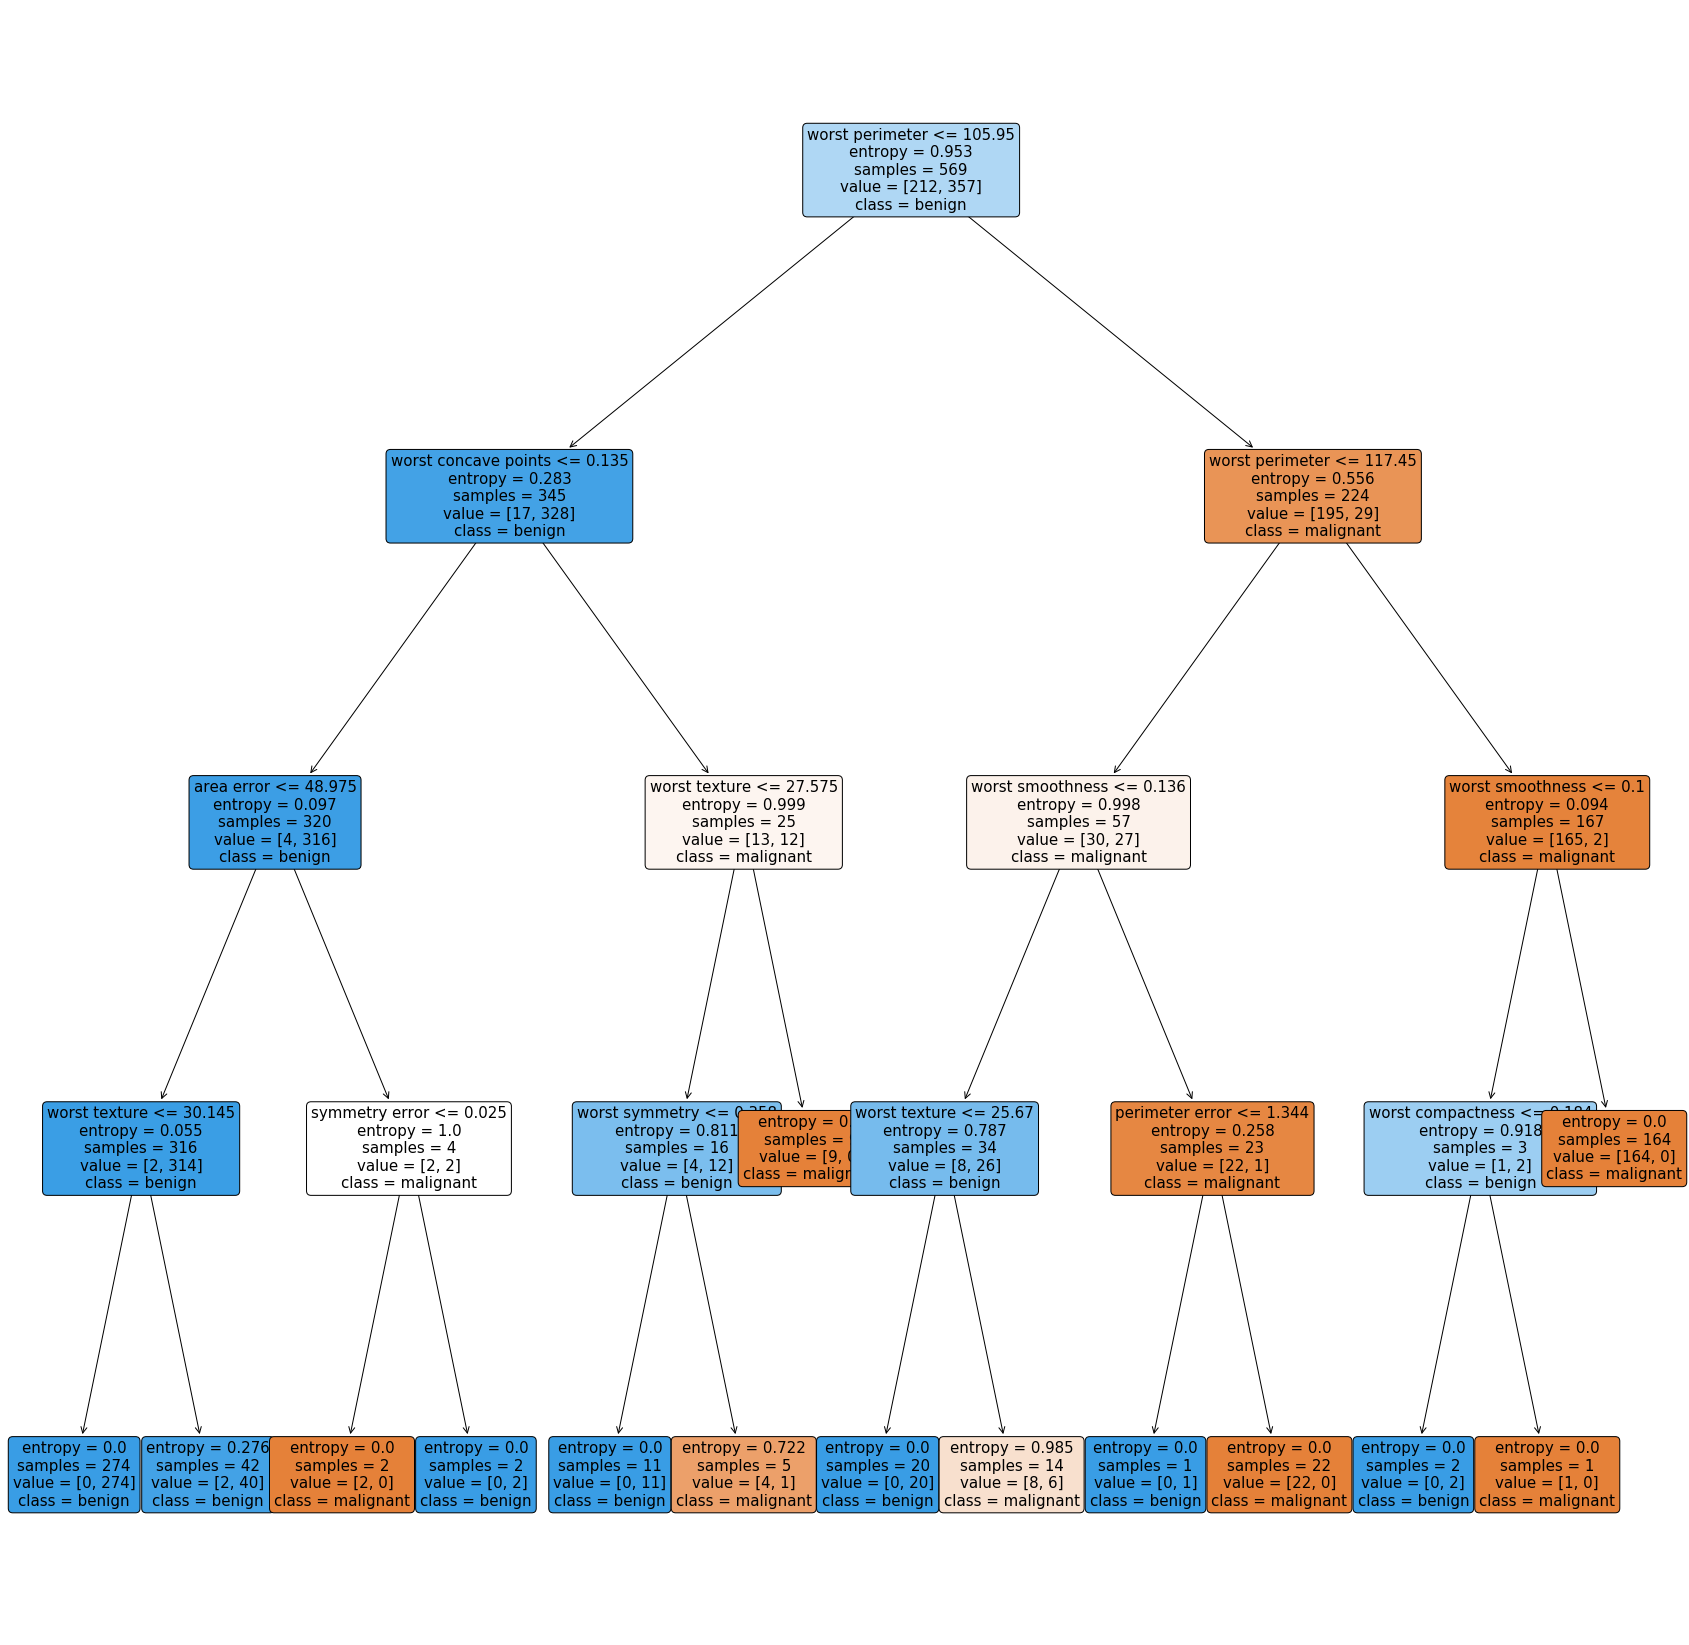

In [26]:
plt.figure(figsize=(30,30))
plot_tree(clfs, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names,
          rounded=True,fontsize=15)
plt.show()

Como podemos ver conseguimos un mayor número de nodos hoja con homogeneidad total y además vemos que puede estar sopreaprendiendo ya que la precicion en el test no ha aumentado mucho mientras que la de training esta muy cerca de 1.0.
Los nuevos nodos creados son los siguientes:

    -worst texture
    -symetry error
    -worst symetry
    -perimeter error
    -worst compactness


# Matriz de confusión:

Analizamos la matriz de confusión de nuestro clf ( árbol óptimo con profundidad= 3)

In [75]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.90625    0.09375   ]
 [0.01869159 0.98130841]]


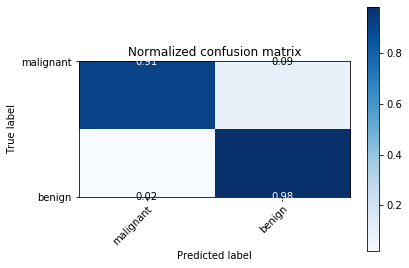

In [76]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
from sklearn.metrics import confusion_matrix

y_test_predicted =clf.predict(X_test)
                            


plot_confusion_matrix(y_test, y_test_predicted, breast_cancer.target_names, normalize=True)

In [77]:
confusion_matrix(y_test, y_test_predicted)

array([[ 58,   6],
       [  2, 105]], dtype=int64)

De las predicciones que ha hecho sobre los del conjunto del test, hemos acertado 58 malignos de 64 y 105 benignos de 107.

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_test_predicted))
print(accuracy_score(y_test,y_test_predicted))
tree_score=classification_report(y_test,y_test_predicted)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9532163742690059


# K-NN CLASSIFIER

El algoritmo K-nn classifier se basa en el resultado de la votación de los k vecinos más cercanos.Como este se basa en la distancia euclidea conviene tener los datos en un rango, es decir, escalarlos o normalizarlos para que tengan un peso mas equitativo y a la hora de elegir los más cercanos lo haga con la nueva escala.



In [30]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos con StardardScaler que resta a cada variable su media y la divide
# entre su desviación típica.
# Otra opción sería usar MinMaxScaler que cambia el rango de la variable al intervalo [0,1]
scaler = StandardScaler()
scaler.fit(breast_cancer.data)
breast_cancer['data_scaled'] = scaler.transform(breast_cancer.data) # Lo almacenamos en el dataset original


In [31]:
# Creamos un nuevo dataframe
df_scaled = pd.DataFrame(data=breast_cancer['data_scaled'], columns=breast_cancer['feature_names'])
df_scaled['result'] = breast_cancer['target']
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


Vamos  a seleccionar solo unas variables para el algoritmo K-nn ya que no es adecuado para problemas con una dimensionalidad alta como es el caso.
Vamos a seleccionar las mismas que hemos obtenido en el arbol de decisión óptimo:

    -Worst permiter
    -Worst concave points
    -Area error
    -Worst smoothness
    -Worst texture

In [35]:
df_knn = df_scaled[['worst perimeter', 'worst concave points', 'area error','worst texture']].copy()
df_knn

,worst perimeter,worst concave points,area error,worst texture
0,2.303601,2.296076,2.487578,-1.359293
1,1.535126,1.087084,0.742402,-0.369203
2,1.347475,1.955000,1.181336,-0.023974
3,-0.249939,2.175786,-0.288378,0.133984
4,1.338539,0.729259,1.190357,-1.466770
...,...,...,...,...
564,1.752563,1.629151,2.604187,0.117700
565,1.421940,0.733827,1.291565,2.047399
566,0.579001,0.414069,0.180698,1.374854
567,2.303601,2.289985,1.009503,2.237926


In [57]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf,df_knn, breast_cancer.target, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.9491476536168004,
 0.9491476536168004,
 0.9508707112609107,
 0.9561349494425718,
 0.9542876588021778,
 0.9577964307320024,
 0.9560117967332123,
 0.9595205686630368,
 0.9595205686630368,
 0.9595508166969147,
 0.9648150548785756,
 0.9631222452683431,
 0.9595821450177165,
 0.961336530982629]

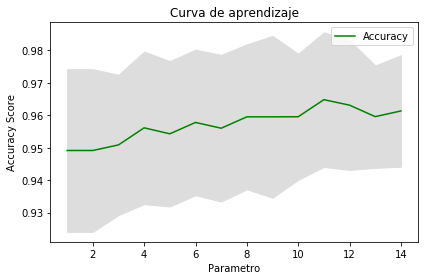

In [56]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El numero de vecinos elegido para el k-nn es 13, ya que es el que menos desviacion tiene respecto a su accuracy score. Además con k = 13 obtenemos una de las mejores tasas de accuracy.


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Como la proporción de clases a predecir está desbalanceada (2/3 y 1/3) es importante
# usar la versión estratificada que mantiene la proporción de elementos de cada clase 
# al hacer la partición

X_train, X_test, y_train, y_test = train_test_split(df_knn, breast_cancer.target, 
                                                    test_size=0.30, stratify=breast_cancer.target,
                                                   random_state = 333)

# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf1 = KNeighborsClassifier(n_neighbors=13, weights='distance')

# Entrenar el clasificador
clf1.fit(X_train, y_train)

train_accuracy = clf1.score(X_train, y_train)
test_accuracy = clf1.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.9766081871345029)

Normalized confusion matrix
[[0.953125   0.046875  ]
 [0.00934579 0.99065421]]


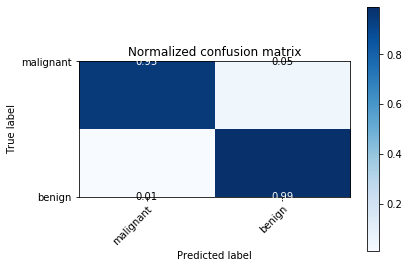

In [67]:


y_test_predicted =clf1.predict(X_test)
plot_confusion_matrix(y_test, y_test_predicted, breast_cancer.target_names, normalize=True)

In [68]:
confusion_matrix(y_test, y_test_predicted)

array([[ 61,   3],
       [  1, 106]], dtype=int64)

In [69]:
print(classification_report(y_test,y_test_predicted))
print(accuracy_score(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

0.9766081871345029


En el K-NN classifier tenemos una precision de 0.98 en la clase de los malignos y 0.97 en los benignos, es decir si predecimos 100 malignos, en realidad hubieramos acertado 98 malignos y hubieramos dicho que 2 eran benignos; mientras que en la clase de los benignos acertariamos 98 de 100. Es decir tenemos mas precision para los malignos.

Recall nos indica la habilidad de encontrar los ejemplos positivos, es decir, en los malignos identificamos el 95% de los estos, mientras que en los benignos clasificas el 99% de estos.

Si nos fijamos en el F1 score( que es una media de la precision y recall en la que contribuyen en la misma medida) vemos que es del 97% en los malignos y del 98% en los benignos lo cual es una puntuación bastante buena.

### Ahora procedemos a compararlo con el tree classifier óptimo que habiamos encontrado:

In [82]:
print(tree_score)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Como podemos ver nuestro clasificados k-nn con k= 13 mejora la clasificación de los malignos con respecto a la del tree classifier. Mejora tanto la precision, como la exhaustividad y por lo tanto el F1 score.( pasa del 94% al 97%).
También mejoramos la capacidad de clasificar a los benignos, supermaos tambien todos sus valores con el K-nn y conseguimos un F1 score de 98% que supera al 96% que teniamos antes.

En conclusión el mejor clasificador obtenido es el k-nn con k=13 vecinos.